# Case Study: **Predicting Customer Churn in a Telecom Company**

## Problem Statement 
- A telecom company wants to reduce customer churn.
- Your task is to build a machine learning model to predict whether a customer will leave the company (churn) based on their demographic and usage data. 

## Dataset 
- We'll use a public dataset: Telco Customer Churn 
- You can download it from https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load Dataset

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv") 
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis (EDA)

### Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Check for missing values 

In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Convert TotalCharges to numeric (has some missing/blank values)

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") 
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True) 

C:\Users\ISHAN\AppData\Local\Temp\ipykernel_10460\3629637722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


### Plot churn distribution 

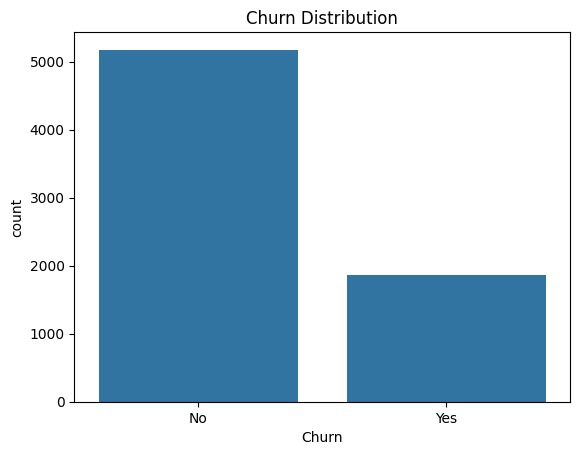

In [6]:
sns.countplot(x="Churn", data=df) 
plt.title("Churn Distribution") 
plt.show() 

## Data Preprocessing

In [7]:
# Drop customerID 
df.drop("customerID", axis=1, inplace=True)

# Convert categorical variables 
categorical_cols = df.select_dtypes(include=["object"]).columns 
le = LabelEncoder() 
for col in categorical_cols: 
    df[col] = le.fit_transform(df[col]) 

# Split features and target 
X = df.drop("Churn", axis=1) 
y = df["Churn"] 

# Scale features 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Building

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluation

In [9]:
y_pred = model.predict(X_test) 

print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7970191625266146

Confusion Matrix:
 [[945  91]
 [195 178]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



## Feature Importance 

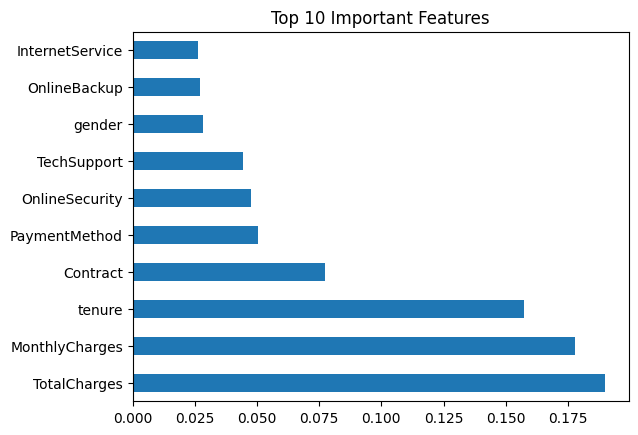

In [10]:
feat_importances = pd.Series(model.feature_importances_, index=df.drop("Churn", axis=1).columns) 
feat_importances.nlargest(10).plot(kind='barh') 
plt.title("Top 10 Important Features") 
plt.show()

## Conclusion 
- We built a churn prediction model using a Random Forest classifier. 
- The model gives an accuracy of ~80% (depending on randomness and parameter tuning). 
- Key features impacting churn include: Contract, MonthlyCharges, Tenure, and TotalCharges. 